In [ ]:
#Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.sample(12)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
31,TM195,25,Male,16,Single,3,4,40932,113
64,TM195,35,Female,16,Partnered,3,3,60261,94
138,TM498,45,Male,16,Partnered,2,2,54576,42
77,TM195,46,Female,16,Partnered,3,2,60261,47
107,TM498,25,Male,14,Single,4,3,48891,127
118,TM498,32,Male,16,Single,4,3,60261,127
96,TM498,24,Female,16,Single,3,3,50028,106
154,TM798,25,Male,18,Partnered,6,4,70966,180
29,TM195,25,Female,14,Partnered,2,2,53439,47
50,TM195,29,Male,18,Partnered,3,3,68220,85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# 488 Missing values in country :object (Mode)  
# 4 missing values in children:float (Mean/Median)
#16340 missing values in agent: float  (Mean/Median)
# 112593 Missing values in company: float (Drop it) and dropping the column bcz of morre missing values

In [ ]:
df=df.drop(["company"], axis=1)

In [ ]:
df.shape

(119390, 32)

In [ ]:
median1=df["children"].median()
median1

0.0

In [ ]:
df["children"].replace(np.nan,median1,inplace=True)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.shape

(119390, 32)

In [ ]:
median2=df["agent"].median()
median2

14.0

In [ ]:
df["agent"].replace(np.nan,median2,inplace=True)

In [ ]:
mode=df["country"].mode().values[0]
mode

'PRT'

In [ ]:
df["country"].replace(np.nan,mode,inplace=True)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [ ]:
#check for duplicates
duplicate=df.duplicated()
print(duplicate.sum())

31994


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

(87370, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 1199 entries, hotel to country_ZWE
dtypes: float64(4), int64(16), object(12), uint8(1167)
memory usage: 162.0+ MB


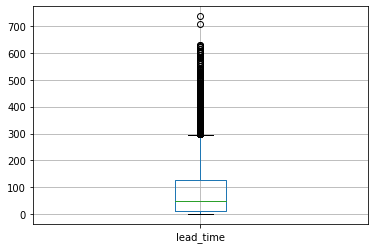

In [ ]:
df.boxplot(column=["lead_time"])

In [ ]:
def remove_outlier(col):
     sorted(col)
     Q1,Q3=col.quantile([0.25,0.75])
     IQR=Q3-Q1
     lower_range=Q1-1.5*IQR
     upper_range=Q3+1.5*IQR
     return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]>high_leadtime,high_leadtime,df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]<low_leadtime,low_leadtime,df["lead_time"])

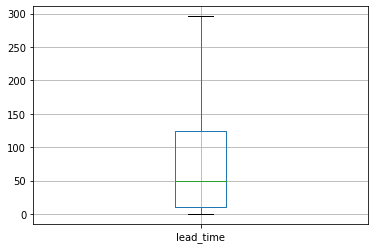

In [ ]:
df.boxplot(column=["lead_time"])

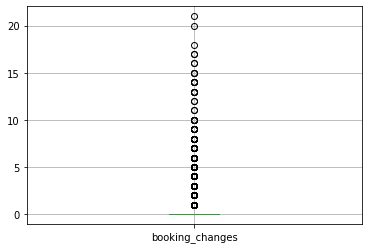

In [ ]:
df.boxplot(column=["booking_changes"])

In [ ]:
dummies=pd.get_dummies(df[['hotel','arrival_date_month','reservation_status_date','customer_type','deposit_type','reserved_room_type','reservation_status','assigned_room_type','market_segment','distribution_channel','meal','country']])

In [ ]:
dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns=['reservation_status','hotel','arrival_date_month','reservation_status_date','customer_type','deposit_type','reserved_room_type','assigned_room_type','market_segment','distribution_channel','meal','country']

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,0,0,0,0,0,0,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df=df.drop(columns, axis=1,inplace=True)